In [1]:
# ------------------------------------------------
# 1. IMPORT LIBRARIES
# ------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# ------------------------------------------------
# 2. LOAD DATASET
# ------------------------------------------------
# Update path if needed
DATA_PATH = r"C:\Users\Dell\Downloads\Churn_Modelling.csv"

df = pd.read_csv(DATA_PATH)

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# ------------------------------------------------
# 3. BASIC DATA INSPECTION
# ------------------------------------------------
print("\nDataset Info:\n")
df.info()



Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
print("\nMissing Values:\n")
print(df.isnull().sum())


Missing Values:

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [6]:
print("\nStatistical Summary:\n")
df.describe()


Statistical Summary:



,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
# ------------------------------------------------
# 4. DATA CLEANING
# ------------------------------------------------
# Drop irrelevant columns
# RowNumber, CustomerId, Surname do not contribute to churn prediction

df = df.drop(columns=["RowNumber", "CustomerId", "Surname"])

print("Columns after dropping irrelevant features:")
print(df.columns)

Columns after dropping irrelevant features:
Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


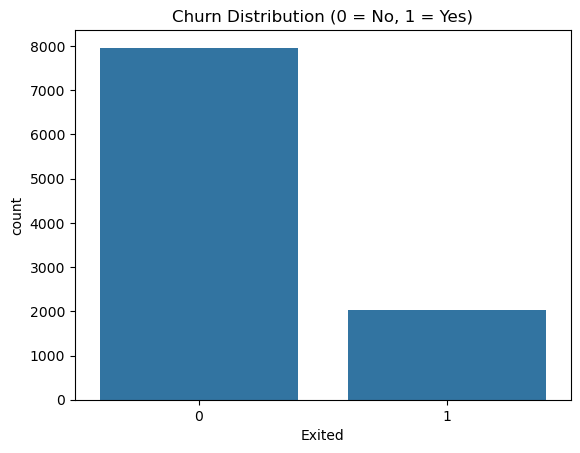

In [8]:
# ------------------------------------------------
# 5. EXPLORATORY DATA ANALYSIS (EDA)
# ------------------------------------------------
# Churn distribution
plt.figure()
sns.countplot(x="Exited", data=df)
plt.title("Churn Distribution (0 = No, 1 = Yes)")
plt.show()

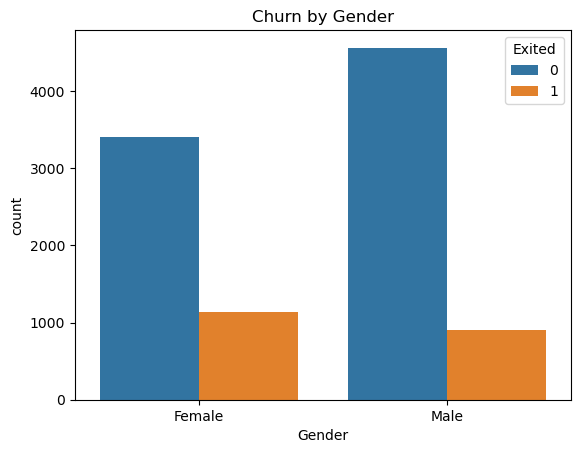

In [9]:
# Churn by Gender
plt.figure()
sns.countplot(x="Gender", hue="Exited", data=df)
plt.title("Churn by Gender")
plt.show()

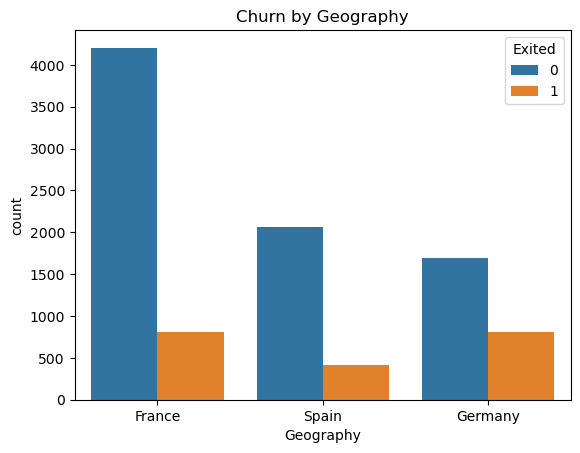

In [10]:
# Churn by Geography
plt.figure()
sns.countplot(x="Geography", hue="Exited", data=df)
plt.title("Churn by Geography")
plt.show()

In [11]:
# ------------------------------------------------
# 6. ENCODING CATEGORICAL VARIABLES
# ------------------------------------------------
# Label Encoding for binary categorical variables

label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])

# One-Hot Encoding for Geography

df = pd.get_dummies(df, columns=["Geography"], drop_first=True)

print("Data after encoding:")
df.head()

Data after encoding:


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [12]:
# ------------------------------------------------
# 7. FEATURE SELECTION
# ------------------------------------------------
X = df.drop("Exited", axis=1)
y = df["Exited"]

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)


Feature matrix shape: (10000, 11)
Target vector shape: (10000,)


In [13]:
# ------------------------------------------------
# 8. TRAIN-TEST SPLIT
# ------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)

Training set: (8000, 11)
Testing set: (2000, 11)


In [14]:
# ------------------------------------------------
# 9. FEATURE SCALING
# ------------------------------------------------
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
##Model testing

In [16]:
# ------------------------------------------------
# 10. MODEL 1: LOGISTIC REGRESSION
# ------------------------------------------------
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test_scaled)

# Evaluation
print("\nLogistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results
Accuracy: 0.808

Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [17]:
# ------------------------------------------------
# 11. MODEL 2: RANDOM FOREST CLASSIFIER
# ------------------------------------------------
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("\nRandom Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf))


Random Forest Results
Accuracy: 0.8625

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.78      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



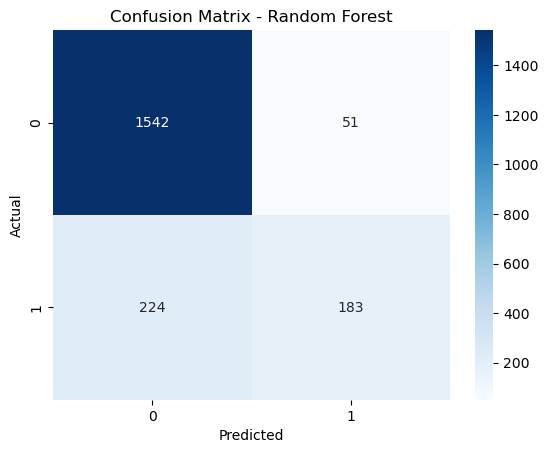

In [18]:
# ------------------------------------------------
# 12. CONFUSION MATRIX VISUALIZATION
# ------------------------------------------------
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [19]:
# ------------------------------------------------
# 13. FEATURE IMPORTANCE (RANDOM FOREST)
# ------------------------------------------------
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nTop Important Features:\n")
print(feature_importance.head(10))


Top Important Features:

             Feature  Importance
2                Age    0.255595
4            Balance    0.143344
8    EstimatedSalary    0.137498
0        CreditScore    0.134865
5      NumOfProducts    0.127452
3             Tenure    0.079522
7     IsActiveMember    0.035532
9  Geography_Germany    0.032779
1             Gender    0.020483
6          HasCrCard    0.017883


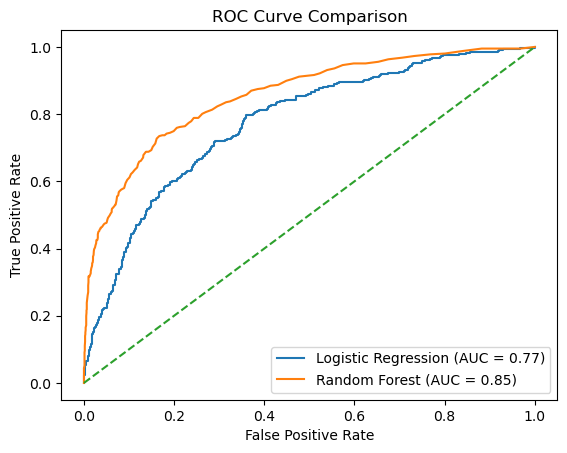

In [20]:
# ------------------------------------------------
# 14. ROC CURVE & AUC SCORE
# ------------------------------------------------
from sklearn.metrics import roc_curve, auc

# Logistic Regression ROC
lr_probs = log_reg.predict_proba(X_test_scaled)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
auc_lr = auc(fpr_lr, tpr_lr)

# Random Forest ROC
rf_probs = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

In [21]:
# ------------------------------------------------
# 15. XGBOOST MODEL
# ------------------------------------------------
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Results")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Results
Accuracy: 0.8615
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.75      0.48      0.58       407

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [22]:
!conda install -c conda-forge xgboost -y

Jupyter detected...
3 channel Terms of Service accepted
Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



In [23]:
# ------------------------------------------------
# 16. LIGHTGBM MODEL
# ------------------------------------------------
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    random_state=42
)

lgbm_model.fit(X_train, y_train)

y_pred_lgbm = lgbm_model.predict(X_test)

print("LightGBM Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print("Classification Report:")
print(classification_report(y_test, y_pred_lgbm))

[LightGBM] [Info] Number of positive: 1630, number of negative: 6370
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000912 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203750 -> initscore=-1.363019
[LightGBM] [Info] Start training from score -1.363019
LightGBM Results
Accuracy: 0.8555
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.72      0.48      0.58       407

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.74      2000
weighted avg       0.84      0.86      0.84      2000

